# Addestramento CNN per la Classificazione di Loghi Fake e Genuine

In questo progetto, invece addestriamo una rete neurale convoluzionale (CNN) personalizzata per distinguere tra loghi autentici e falsi.

## 1. Importazione delle Librerie

Importiamo le librerie necessarie:
1. **TensorFlow e Keras**: Per costruire, addestrare e valutare la CNN.
2. **OS**: Per la gestione dei file e directory.
3. **Scikit-learn**: Per il calcolo della matrice di confusione e il classification report.
4. **Matplotlib e Seaborn**: Per la visualizzazione dei risultati.

In [1]:
import tensorflow as tf
from keras import layers, models
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 2. Creazione della CNN Personalizzata

Definiamo la rete neurale convoluzionale (CNN) utilizzando Keras.

In [2]:
def create_custom_cnn(input_shape=(128, 128, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid per classificazione binaria
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Creazione del modello
custom_cnn = create_custom_cnn()

# Visualizza l'architettura del modello
custom_cnn.summary()

/Users/ilaria/anaconda3/envs/DTM/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,561 (49.36 MB)

 Trainable params: 12,938,561 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Configurazione della Data Augmentation

Configuriamo la data augmentation per il dataset di training per migliorare la generalizzazione del modello.

In [3]:
# Directory dei dati
train_dir = '/Users/ilaria/ProgettoDTM/archive1/train'
test_dir = '/Users/ilaria/ProgettoDTM/archive1/test'

# Data augmentation per il set di training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotazioni casuali
    width_shift_range=0.2,   # Traslazioni orizzontali
    height_shift_range=0.2,  # Traslazioni verticali
    shear_range=0.2,         # Trasformazioni di taglio
    zoom_range=0.2,          # Zoom casuale
    horizontal_flip=True,    # Riflesso orizzontale
    fill_mode='nearest'      # Riempimento per pixel mancanti
)

# Generatore per il set di test (senza augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flussi di dati
train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 659 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


## 4. Addestramento del Modello

Addestriamo il modello personalizzato utilizzando i dati di training e valutiamo la performance sui dati di validazione.

In [4]:
# Addestramento del modello
history = custom_cnn.fit(train_data, epochs=10, validation_data=test_data)

# Valutazione sul test set
test_loss, test_acc = custom_cnn.evaluate(test_data)
print(f"Test Accuracy: {test_acc}")

/Users/ilaria/anaconda3/envs/DTM/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.5988 - loss: 1.0930 - val_accuracy: 0.7212 - val_loss: 0.5833
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.6609 - loss: 0.6140 - val_accuracy: 0.6970 - val_loss: 0.5095
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.6853 - loss: 0.5363 - val_accuracy: 0.6909 - val_loss: 0.5078
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.6817 - loss: 0.5421 - val_accuracy: 0.7152 - val_loss: 0.4831
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.6685 - loss: 0.5333 - val_accuracy: 0.7030 - val_loss: 0.4841
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.7008 - loss: 0.5312 - val_accuracy: 0.6909 - val_loss: 0.4818
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.6997 - loss: 0.4969 - val_accuracy: 0.7273 - val_loss: 0.4783
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.6955 - loss: 0.5071 - val_accuracy: 0.

## 5. Valutazione delle Performance

Generiamo la matrice di confusione e il classification report per analizzare le performance del modello.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


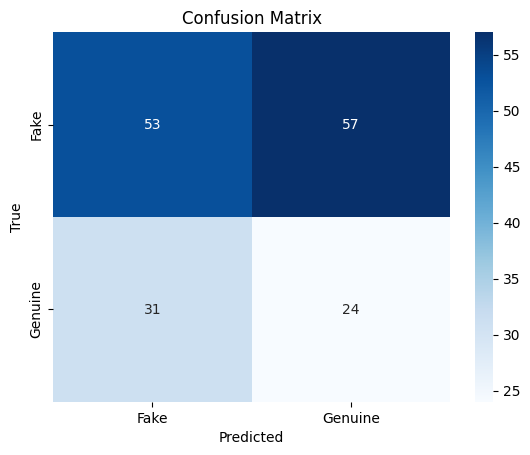

              precision    recall  f1-score   support

        Fake       0.63      0.48      0.55       110
     Genuine       0.30      0.44      0.35        55

    accuracy                           0.47       165
   macro avg       0.46      0.46      0.45       165
weighted avg       0.52      0.47      0.48       165



In [5]:
# Predizioni sul test set
predictions = custom_cnn.predict(test_data)
predicted_classes = (predictions > 0.5).astype("int32")  # Classifica come 0 (Fake) o 1 (Genuine)
true_classes = test_data.classes  # Classi reali

# Creazione della matrice di confusione
cm = confusion_matrix(true_classes, predicted_classes)

# Visualizzazione della matrice di confusione
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Genuine'], yticklabels=['Fake', 'Genuine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_classes, predicted_classes, target_names=['Fake', 'Genuine']))

## 6. Analisi del Dataset

Contiamo il numero di immagini per ciascuna classe nel training e nel test set.

In [6]:
# Percorsi alle directory
train_dir = '/Users/ilaria/ProgettoDTM/archive1/train'
test_dir = '/Users/ilaria/ProgettoDTM/archive1/test'

# Conta le immagini per classe nel training set
train_fake_count = len(os.listdir(os.path.join(train_dir, 'Fake')))
train_genuine_count = len(os.listdir(os.path.join(train_dir, 'Genuine')))

# Conta le immagini per classe nel test set
test_fake_count = len(os.listdir(os.path.join(test_dir, 'Fake')))
test_genuine_count = len(os.listdir(os.path.join(test_dir, 'Genuine')))

# Stampa i risultati
print(f"Training set: Fake = {train_fake_count}, Genuine = {train_genuine_count}")
print(f"Test set: Fake = {test_fake_count}, Genuine = {test_genuine_count}")

Training set: Fake = 439, Genuine = 220
Test set: Fake = 110, Genuine = 55
